<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Introduction to NumPy

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://fpq.io'>http://fpq.io</a> | <a href='mailto:team@tpq.io'>team@tpq.io</a>

## Arrays with Python Lists

Let us set the benchmark with pure Python. First, a vector as `list` object.

In [1]:
v = [0.5, 0.75, 1.0, 1.5, 2.0]  # vector of numbers

Second, a matrix as list of list.

In [2]:
m = [v, v, v]  # matrix of numbers
m

[[0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0]]

In [3]:
m[1]

[0.5, 0.75, 1.0, 1.5, 2.0]

In [4]:
m[1][0]

0.5

Third a cube as nested list.

In [13]:
v1 = [0.5, 1.5]
v2 = [1, 2]
m = [v1, v2]
c = [m, m]  # cube of numbers
c

[[[0.5, 1.5], [1, 2]], [[0.5, 1.5], [1, 2]]]

In [11]:
c[1][1][0]

1

In [16]:
v = [0.5, 0.75, 1.0, 1.5, 2.0]
m = [v, v, v]
m

[[0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0]]

In [17]:
v[0] = 'Python'
m

[['Python', 0.75, 1.0, 1.5, 2.0],
 ['Python', 0.75, 1.0, 1.5, 2.0],
 ['Python', 0.75, 1.0, 1.5, 2.0]]

In [19]:
from copy import deepcopy
v = [0.5, 0.75, 1.0, 1.5, 2.0]
m = 3 * [deepcopy(v), ]
m

[[0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0]]

In [20]:
v[0] = 'Python'
m

[[0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0],
 [0.5, 0.75, 1.0, 1.5, 2.0]]

## NumPy Data Structures

### Regular NumPy Arrays

NumPy is a cornerstone in the Python scientific stack and PyData ecosystem.

In [21]:
import numpy as np

It provides the powerful `ndarray` class for the handling of multi-dimensional arrays.

In [22]:
a = np.array([0, 0.5, 1.0, 1.5, 2.0])
type(a)

numpy.ndarray

In [23]:
a[:2]  # indexing as with list objects in 1 dimension

array([ 0. ,  0.5])

In [24]:
a.sum()  # sum of all elements

5.0

In [25]:
a.std()  # standard deviation

0.70710678118654757

In [26]:
a.cumsum()  # running cumulative sum

array([ 0. ,  0.5,  1.5,  3. ,  5. ])

Multiplication of a `list` object.

In [27]:
l = [0., 0.5, 1.5, 3., 5.]
2 * l

[0.0, 0.5, 1.5, 3.0, 5.0, 0.0, 0.5, 1.5, 3.0, 5.0]

In contrast, vectorized operation on the array.

In [28]:
2 * a

array([ 0.,  1.,  2.,  3.,  4.])

In [29]:
a ** 2

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ])

Universal functions for fast computations.

In [30]:
np.sqrt(a)

array([ 0.        ,  0.70710678,  1.        ,  1.22474487,  1.41421356])

In [31]:
np.sqrt(2.5)

1.5811388300841898

In [32]:
import math

In [33]:
math.sqrt(2.5)

1.5811388300841898

In [34]:
math.sqrt(a)

TypeError: only length-1 arrays can be converted to Python scalars

In [35]:
%timeit np.sqrt(2.5)

The slowest run took 24.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 749 ns per loop


In [36]:
%timeit math.sqrt(2.5)

The slowest run took 59.36 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 135 ns per loop


In [37]:
b = np.array([a, a * 2])
b

array([[ 0. ,  0.5,  1. ,  1.5,  2. ],
       [ 0. ,  1. ,  2. ,  3. ,  4. ]])

Data selection via indexing.

In [38]:
b[0]  # first row

array([ 0. ,  0.5,  1. ,  1.5,  2. ])

In [39]:
b[0, 2]  # third element of first row

1.0

In [40]:
b.sum()

15.0

In [41]:
b.sum(axis=0)
  # sum along axis 0, i.e. column-wise sum

array([ 0. ,  1.5,  3. ,  4.5,  6. ])

In [42]:
b.sum(axis=1)
  # sum along axis 1, i.e. row-wise sum

array([  5.,  10.])

Typical construction of `ndarray` objects.

In [43]:
c = np.zeros((2, 3, 4), dtype='i', order='C')  # also: np.ones()
c

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int32)

In [49]:

d = np.ones_like(c, dtype='f', order='C')  # also: np.zeros_like()
d

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]], dtype=float32)

In [50]:
e = np.empty((2, 3, 4))
e

array([[[  0.00000000e+000,   4.94065646e-324,   9.88131292e-324,
           1.48219694e-323],
        [  1.97626258e-323,   2.47032823e-323,   2.96439388e-323,
           3.45845952e-323],
        [  3.95252517e-323,   4.44659081e-323,   4.94065646e-323,
           5.43472210e-323]],

       [[  5.92878775e-323,   6.42285340e-323,   6.91691904e-323,
           7.41098469e-323],
        [  7.90505033e-323,   8.39911598e-323,   8.89318163e-323,
           9.38724727e-323],
        [  9.88131292e-323,   1.03753786e-322,   1.08694442e-322,
           1.13635099e-322]]])

In [51]:
f = np.empty_like(c)
f

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int32)

In [52]:
np.eye(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [53]:
g = np.linspace(5, 10, 15)  # start, end, number of points
g

array([  5.        ,   5.35714286,   5.71428571,   6.07142857,
         6.42857143,   6.78571429,   7.14285714,   7.5       ,
         7.85714286,   8.21428571,   8.57142857,   8.92857143,
         9.28571429,   9.64285714,  10.        ])

### Structured Arrays

In [54]:
dt = np.dtype([('Name', 'S10'), ('Age', 'i4'),
               ('Height', 'f'), ('Children/Pets', 'i4', 2)])
s = np.array([('Smith', 45, 1.83, (0, 1)),
              ('Jones', 53, 1.72, (2, 2))], dtype=dt)
s

array([(b'Smith', 45,  1.83000004, [0, 1]),
       (b'Jones', 53,  1.72000003, [2, 2])], 
      dtype=[('Name', 'S10'), ('Age', '<i4'), ('Height', '<f4'), ('Children/Pets', '<i4', (2,))])

In [55]:
s['Name']

array([b'Smith', b'Jones'], 
      dtype='|S10')

In [56]:
s['Height'].mean()

1.7750001

In [57]:
s[1]['Age']

53

## Vectorization of Code

Two dummy data sets.

In [58]:
r = np.random.standard_normal((4, 3))
s = np.random.standard_normal((4, 3))

In [64]:
r

array([[-0.86052471, -0.01042798, -0.90178649],
       [ 0.19892424, -0.1433657 , -0.98188379],
       [ 0.73998549, -0.45654307, -0.90938178],
       [-0.61124022,  1.51511873, -0.21050503]])

In [65]:
s

array([[-0.72096281,  1.06075361,  0.18483758],
       [-0.10728007,  0.20941191,  0.50942339],
       [ 0.83081001, -0.21962294, -0.39627333],
       [ 0.55065906,  0.35568288, -1.00373896]])

Element-wise addition.

In [66]:
r + s

array([[-1.58148752,  1.05032563, -0.7169489 ],
       [ 0.09164417,  0.06604622, -0.4724604 ],
       [ 1.5707955 , -0.67616602, -1.3056551 ],
       [-0.06058116,  1.8708016 , -1.21424399]])

Broadcasting.

In [67]:
2 * r + 3

array([[ 1.27895057,  2.97914404,  1.19642703],
       [ 3.39784848,  2.7132686 ,  1.03623242],
       [ 4.47997098,  2.08691386,  1.18123645],
       [ 1.77751957,  6.03023745,  2.57898993]])

In [68]:
s = np.random.standard_normal(3)

In [69]:
s

array([ 0.81553133, -0.3352415 ,  1.36852376])

In [70]:
r + s

array([[-0.04499339, -0.34566948,  0.46673727],
       [ 1.01445557, -0.4786072 ,  0.38663997],
       [ 1.55551682, -0.79178457,  0.45914198],
       [ 0.20429111,  1.17987723,  1.15801872]])

In [73]:
# causes intentional error
s = np.random.standard_normal(4)
r + s

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [75]:
r.transpose()

array([[-0.86052471,  0.19892424,  0.73998549, -0.61124022],
       [-0.01042798, -0.1433657 , -0.45654307,  1.51511873],
       [-0.90178649, -0.98188379, -0.90938178, -0.21050503]])

In [76]:
s

array([-2.23129428, -0.16643615,  0.22647853,  1.61867633])

In [77]:
r.transpose() + s

array([[-3.09181899,  0.03248809,  0.96646402,  1.00743611],
       [-2.24172226, -0.30980185, -0.23006454,  3.13379505],
       [-3.13308076, -1.14831994, -0.68290325,  1.40817129]])

In [78]:
np.shape(s)

(4,)

In [81]:
np.shape(r.T)

(3, 4)

In [83]:
np.reshape(s,(4,1))

array([[-2.23129428],
       [-0.16643615],
       [ 0.22647853],
       [ 1.61867633]])

In [84]:
np.reshape(s,(1,4))

array([[-2.23129428, -0.16643615,  0.22647853,  1.61867633]])

A general Python function.

In [85]:
def f(x):
    return 3 * x + 5

In [86]:
f(0.5)  # float object

6.5

In [87]:
f(r)  # NumPy array

array([[ 2.41842586,  4.96871607,  2.29464054],
       [ 5.59677272,  4.56990291,  2.05434864],
       [ 7.21995647,  3.63037078,  2.27185467],
       [ 3.16627935,  9.54535618,  4.3684849 ]])

In [93]:
# causes intentional error
import math
print(math.sin(90))
math.sin(r)

0.8939966636005579


TypeError: only length-1 arrays can be converted to Python scalars

In [90]:
np.sin(r)  # array as input

array([[-0.7581848 , -0.01042779, -0.78443616],
       [ 0.1976149 , -0.14287509, -0.83154521],
       [ 0.6742772 , -0.44084787, -0.78912416],
       [-0.57388356,  0.9984504 , -0.20895381]])

In [91]:
np.sin(np.pi)  # float as input

1.2246467991473532e-16

## Memory Layout

Cf. http://eli.thegreenplace.net/2015/memory-layout-of-multi-dimensional-arrays/

In [95]:
x = np.random.standard_normal((5, 100000))
y = 2 * x + 3  # linear equation y = a * x + b
C = np.array((x, y), order='C')
F = np.array((x, y), order='F')
x = 0.0; y = 0.0  # memory clean-up

In [97]:
np.shape(x)

()

In [99]:
C[:2].round(2)

array([[[ 0.06,  0.27,  0.22, ..., -1.06, -1.02, -1.78],
        [ 0.03, -0.97,  0.22, ..., -0.4 , -0.3 , -0.59],
        [-0.82, -0.97,  1.36, ...,  0.51, -1.45, -2.26],
        [-0.39, -0.58, -0.11, ..., -0.31,  0.42,  0.72],
        [-0.15,  1.63,  1.56, ...,  0.83,  0.01, -1.23]],

       [[ 3.13,  3.55,  3.44, ...,  0.88,  0.97, -0.56],
        [ 3.06,  1.06,  3.44, ...,  2.21,  2.4 ,  1.82],
        [ 1.37,  1.05,  5.72, ...,  4.01,  0.1 , -1.53],
        [ 2.23,  1.84,  2.78, ...,  2.39,  3.83,  4.43],
        [ 2.7 ,  6.27,  6.12, ...,  4.66,  3.01,  0.54]]])

In [101]:
C

array([[[ 0.06314762,  0.27438596,  0.2222815 , ..., -1.060365  ,
         -1.01500673, -1.77783109],
        [ 0.03064551, -0.9722712 ,  0.21963285, ..., -0.39663364,
         -0.29756182, -0.58813928],
        [-0.81682732, -0.97425646,  1.35938597, ...,  0.50666965,
         -1.45240989, -2.26435194],
        [-0.38685536, -0.57989191, -0.10835358, ..., -0.30597835,
          0.4174777 ,  0.71684602],
        [-0.1478902 ,  1.63256736,  1.55832411, ...,  0.83121489,
          0.00712252, -1.22995875]],

       [[ 3.12629523,  3.54877192,  3.44456301, ...,  0.87926999,
          0.96998654, -0.55566218],
        [ 3.06129102,  1.0554576 ,  3.43926571, ...,  2.20673273,
          2.40487636,  1.82372144],
        [ 1.36634537,  1.05148709,  5.71877195, ...,  4.0133393 ,
          0.09518022, -1.52870389],
        [ 2.22628928,  1.84021617,  2.78329283, ...,  2.38804329,
          3.8349554 ,  4.43369204],
        [ 2.70421961,  6.26513473,  6.11664822, ...,  4.66242977,
          3.01

In [102]:
F

array([[[ 0.06314762,  0.27438596,  0.2222815 , ..., -1.060365  ,
         -1.01500673, -1.77783109],
        [ 0.03064551, -0.9722712 ,  0.21963285, ..., -0.39663364,
         -0.29756182, -0.58813928],
        [-0.81682732, -0.97425646,  1.35938597, ...,  0.50666965,
         -1.45240989, -2.26435194],
        [-0.38685536, -0.57989191, -0.10835358, ..., -0.30597835,
          0.4174777 ,  0.71684602],
        [-0.1478902 ,  1.63256736,  1.55832411, ...,  0.83121489,
          0.00712252, -1.22995875]],

       [[ 3.12629523,  3.54877192,  3.44456301, ...,  0.87926999,
          0.96998654, -0.55566218],
        [ 3.06129102,  1.0554576 ,  3.43926571, ...,  2.20673273,
          2.40487636,  1.82372144],
        [ 1.36634537,  1.05148709,  5.71877195, ...,  4.0133393 ,
          0.09518022, -1.52870389],
        [ 2.22628928,  1.84021617,  2.78329283, ...,  2.38804329,
          3.8349554 ,  4.43369204],
        [ 2.70421961,  6.26513473,  6.11664822, ...,  4.66242977,
          3.01

In [103]:
%timeit C.sum()

1000 loops, best of 3: 632 µs per loop


In [104]:
%timeit F.sum()

1000 loops, best of 3: 631 µs per loop


C ordering faster along second axis.

In [105]:
%timeit C.sum(axis=0)

100 loops, best of 3: 4.31 ms per loop


In [106]:
%timeit C.sum(axis=1)

100 loops, best of 3: 2.18 ms per loop


F ordering faster along first axis.

In [107]:
%timeit F.sum(axis=0)

100 loops, best of 3: 11.3 ms per loop


In [108]:
%timeit F.sum(axis=1)

10 loops, best of 3: 23.5 ms per loop


Absolute advantage for C ordering for operation along single axis.

In [109]:
F = 0.0; C = 0.0  # memory clean-up

## Linear Algebra

### Basic Functionality

Let us start with two vectors (i.e. one-dimensional array objects).

In [110]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])

In [111]:
a * b  # element-wise product

array([ 2,  6, 12])

In [112]:
np.dot(a, b)  # dot product

20

In [113]:
np.inner(a, b)  # inner product

20

In [114]:
o = np.outer(a, b)  # outer product
o

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12]])

In [117]:
np.linalg.matrix_power(o, 3)  # matrix power o ** 3

array([[ 800, 1200, 1600],
       [1600, 2400, 3200],
       [2400, 3600, 4800]])

In [118]:
np.dot(o,o)

array([[ 40,  60,  80],
       [ 80, 120, 160],
       [120, 180, 240]])

In [116]:
np.dot(np.dot(o, o), o)  # same as before

array([[ 800, 1200, 1600],
       [1600, 2400, 3200],
       [2400, 3600, 4800]])

In [119]:
np.linalg.eigvals(o)  # eigenvalues

array([  2.00000000e+01,   3.72357428e-17,   0.00000000e+00])

In [120]:
np.linalg.eig(o)  # eigenvalues + right eigenvectors

(array([  2.00000000e+01,   3.72357428e-17,   0.00000000e+00]),
 array([[-0.26726124,  0.01384887,  0.14074157],
        [-0.53452248, -0.80323473, -0.82453357],
        [-0.80178373,  0.59550161,  0.54802939]]))

In [121]:
np.linalg.norm(o, ord=1)  # norm of order 1

24.0

In [122]:
np.linalg.norm(o, ord=2)  # norm of order 2 (default)

20.149441679609886

In [124]:
np.linalg.norm(o, axis=0)  # along first axis

array([  7.48331477,  11.22497216,  14.96662955])

In [123]:
np.linalg.norm(o, axis=1)  # along second axis

array([  5.38516481,  10.77032961,  16.15549442])

In [125]:
m = np.arange(4).reshape((2, 2))
m

array([[0, 1],
       [2, 3]])

In [126]:
np.linalg.det(m)  # determinant

-2.0

In [127]:
i = np.linalg.inv(m)  # inverse
i

array([[-1.5,  0.5],
       [ 1. ,  0. ]])

In [135]:
np.dot(m, i) #A.A Inv = I

array([[ 1.,  0.],
       [ 0.,  1.]])

In [129]:
np.eye(2)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [130]:
np.dot(m, i) == np.eye(2)

array([[ True,  True],
       [ True,  True]], dtype=bool)

### Soving Systems of Linear Equations

In [ ]:
import numpy as np

We are going to solve equations of type:

$$
a \cdot x = b
$$

Consider the system of linear equations which fits the above type:

\begin{eqnarray}
a_1^1 \cdot x_1 + a_1^2 \cdot x_1 = b_1 \\
a_2^1 \cdot x_2 + a_2^2 \cdot x_2 = b_2
\end{eqnarray}

First, matrix $a$.

In [131]:
a = np.array([[3, 1], [1, 2]])

Second, vector $b$.

In [132]:
b = np.array([9, 8])

Third, the solution.

In [133]:
x = np.linalg.solve(a, b)
x

array([ 2.,  3.])

In [134]:
np.dot(a, x)  # checking

array([ 9.,  8.])

Or larger matrices/vectors.

In [136]:
a = np.array([[3, 1, 1], [1, 2, 1], [1, 1, 2]])

In [137]:
b = np.array([10.5, 8.25, 7.75])

In [138]:
x = np.linalg.solve(a, b)
x

array([ 2.21428571,  2.17857143,  1.67857143])

In [139]:
np.dot(a, x)  # checking

array([ 10.5 ,   8.25,   7.75])

## Random Numbers

NumPy has powerful pseudo-random number generating functions available. Most of them get covered later. Very often, we use **standard-normally distributed pseudo-random numbers**.

In [140]:
import numpy as np

In [141]:
np.random.standard_normal()  # single number

0.2049282718364646

In [142]:
np.random.standard_normal(5)  # 1d array

array([-0.05802607,  0.16080126,  0.37053142,  0.35419757, -1.38204626])

In [143]:
a = np.random.standard_normal((2, 6)) * 0.5  # 2d array
a

array([[ 0.33336918, -0.92034836, -0.83925211, -0.48113513,  0.42740879,
         0.1082599 ],
       [ 0.40442675, -0.01121294, -0.42859405,  0.84867504, -0.33481502,
         0.37209202]])

In [144]:
np.round(a, 3)

array([[ 0.333, -0.92 , -0.839, -0.481,  0.427,  0.108],
       [ 0.404, -0.011, -0.429,  0.849, -0.335,  0.372]])

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

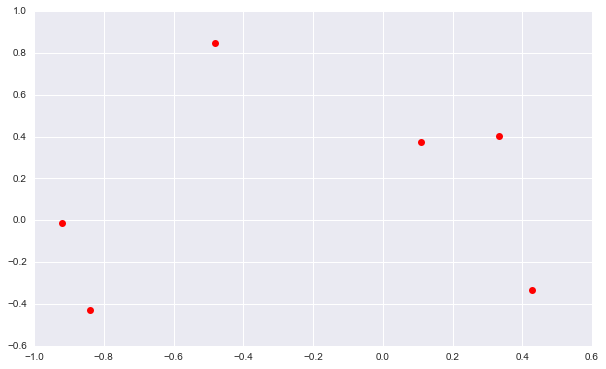

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(a[0], a[1], 'ro');

## OLS Regression 

NumPy provides two convenience functions to implement ordinary least squares regression. They are `np.polyfit` and `np.polyval`.

In [151]:
a = 100 + 5 * np.random.standard_normal((2, 8))

In [163]:
# a = np.random.standard_normal((2, 8))
np.shape(a)

(2, 8)

In [153]:
a[0]

array([ 102.07737393,  106.98649835,   91.62668597,  100.72535507,
        112.47822384,   96.85569449,   99.55735887,  101.58439665])

In [154]:
a[1]

array([ 101.70652989,   88.07540231,   98.08850229,   99.15477255,
        103.4204367 ,  102.23113663,   98.40762768,   89.00146894])

In [155]:
reg1 = np.polyfit(a[0], a[1], 1)  # linear regression
reg1

array([ -5.76842884e-02,   1.03364908e+02])

In [156]:
reg2 = np.polyfit(a[0], a[1], 2)  # quadratic regression
reg2

array([  4.01436776e-02,  -8.26855101e+00,   5.21819967e+02])

In [161]:
reg3 = np.polyfit(a[0], a[1], 3)  # cubic regression
reg3

array([  1.88599236e-02,  -5.72114484e+00,   5.76655192e+02,
        -1.92154958e+04])

In [164]:
np.polyval?

A plot of the regression lines.

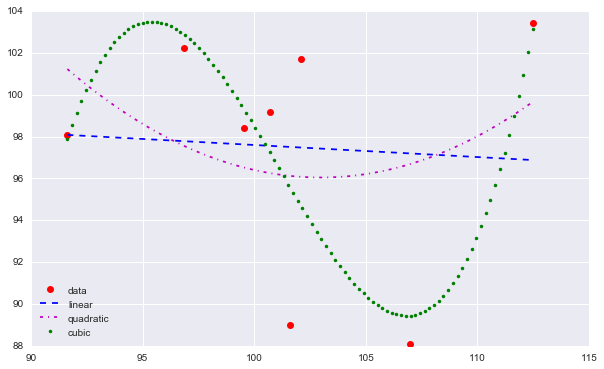

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(a[0], a[1], 'ro', label='data');
x = np.linspace(a[0].min(), a[0].max(), 100)
plt.plot(x, np.polyval(reg1, x), 'b--', label='linear')
plt.plot(x, np.polyval(reg2, x), 'm-.', label='quadratic')
plt.plot(x, np.polyval(reg3, x), 'g.', label='cubic')
plt.legend(loc=0);

A polynomial of degree 7 has 8 degrees of freedom.

In [159]:
reg8 = np.polyfit(a[0], a[1], 7)  # perfect regression
reg8

array([  4.89901023e-03,  -3.47966678e+00,   1.05855874e+03,
        -1.78791052e+05,   1.81073519e+07,  -1.09962187e+09,
         3.70755887e+10,  -5.35408560e+11])

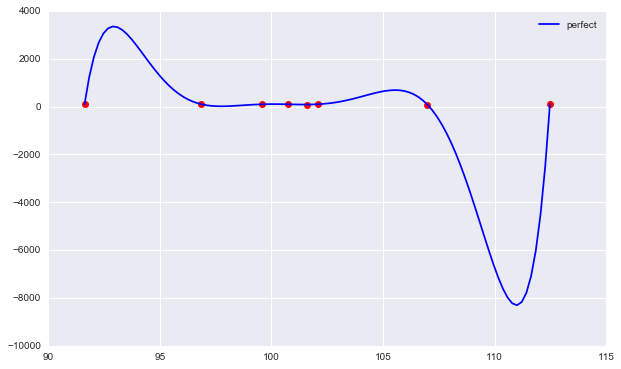

In [160]:
plt.figure(figsize=(10, 6))
plt.plot(a[0], a[1], 'ro');
plt.plot(x, np.polyval(reg8, x), 'b', label='perfect')
plt.legend();

## Simulating Short Rate Processes

In this example, we are going to simulate the **Vasicek short rate model** using Python as well as NumPy and vectorization. The SDE of the model is given by:

$$
dr_t = \kappa(\theta - r_t)dt + \sigma dZ_t
$$

A possible discretization of the model is given by

$$
r_t = r_s + \kappa (\theta - r_s) \Delta t + \sigma \sqrt{\Delta t} z_t
$$

for $s = t - \Delta t$. $Z_t$ is a standard Brownian motion, $z$ a standard normally distributed rv.

All assumptions as Python variables.

In [165]:
# model parameters
r0 = 0.01  # starting value
kappa = 1.0  # mean-reversion factor
theta = 0.025  # long-term mean
sigma = 0.01  # volatiltiy
T = 1.0  # time horizon in year fractions
# Monte Carlo parameters
I = 10  # number of paths
M = 15  # number of time intervals
dt = T / M  # length of time interval

### A Pure Python Version

The Python function.

In [180]:
import random


Object `xrange` not found.


In [176]:
def vasicek_python(I=I, M=M):
    paths = {}
    for i in xrange(I):
        path = [r0, ]
        for t in xrange(1, M + 1):
            r_t = path[t - 1] + kappa * (theta - path[t - 1]) * dt \
                    + sigma * dt ** 0.5 * random.gauss(0, 1)
            path.append(r_t)
        paths[i] = path
    return paths

The simulation and a sample path.

In [177]:
%time paths  = vasicek_python()

AttributeError: module 'random' has no attribute 'xrange'

In [178]:
import cProfile

In [179]:
func = '''
def vasicek_python(I=I, M=M):
    paths = {}
    for i in xrange(I):
        path = [r0, ]
        for t in xrange(1, M + 1):
            r_t = path[t - 1] + kappa * (theta - path[t - 1]) * dt \
                    + sigma * dt ** 0.5 * random.gauss(0, 1)
            path.append(r_t)
        paths[i] = path
    return paths
vasicek_python(I=10000, M=50)
'''

In [ ]:
cProfile.run(func)

In [ ]:
paths[0]

Some sample paths visualized. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [ ]:
plt.figure(figsize=(10, 6))
for i in paths.iterkeys():
    plt.plot(paths[i])

### The Vectorized NumPy Version

A function using NumPy vectorization.

In [ ]:
import numpy as np

In [199]:
def vasicek_numpy(I=I, M=M):
    paths = np.zeros((M + 1, I))
    paths[0] = r0
    for t in range(1, M + 1):
        paths[t] = paths[t - 1] + kappa * (theta - paths[t - 1]) * dt \
                    + sigma * dt ** 0.5 * np.random.standard_normal(I)
    return paths

In [200]:
%time paths  = vasicek_numpy()

Wall time: 972 ms


In [204]:
func = '''
def vasicek_numpy(I=I, M=M):
    paths = np.zeros((M + 1, I))
    paths[0] = r0
    for t in range(1, M + 1):
        paths[t] = paths[t - 1] + kappa * (theta - paths[t - 1]) * dt \
                    + sigma * dt ** 0.5 * np.random.standard_normal(I)
    return paths
vasicek_numpy(I=10000, M=50)
'''

In [205]:
cProfile.run(func)

         55 function calls in 0.025 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001    0.025    0.025 <string>:2(<module>)
        1    0.006    0.006    0.024    0.024 <string>:2(vasicek_numpy)
        1    0.000    0.000    0.025    0.025 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {built-in method numpy.core.multiarray.zeros}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       50    0.018    0.000    0.018    0.000 {method 'standard_normal' of 'mtrand.RandomState' objects}




The results object.

In [206]:
paths

array([[ 0.01      ,  0.01      ,  0.01      , ...,  0.01      ,
         0.01      ,  0.01      ],
       [ 0.00967996,  0.00988326,  0.00858148, ...,  0.01187596,
         0.01069746,  0.01269793],
       [ 0.01086668,  0.00967916,  0.01180261, ...,  0.01479805,
         0.01044649,  0.01400972],
       ..., 
       [ 0.00729583,  0.01717702,  0.01991244, ...,  0.02798257,
         0.01940385,  0.02668352],
       [ 0.00929337,  0.01698106,  0.02359764, ...,  0.02536344,
         0.01971295,  0.02825011],
       [ 0.00974306,  0.01925744,  0.02509291, ...,  0.02761655,
         0.0163702 ,  0.02752599]])

And a visualization of the results:

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(paths);

### Speed Comparison

We compare the speed of the pure Python version with that of the NumPy version on the basis of somewhat more meaningful parameters.

In [ ]:
I = 10000
M = 50

In [ ]:
%time paths_python = vasicek_python(I, M)

The speed-up of NumPy is more than 20.

In [ ]:
%time paths_numpy = vasicek_numpy(I, M)

### Dynamic Compiling

Now the application of dynamic compiling methods via Numba.

In [181]:
import numba as nb

The hybrid function combines Python looping with NumPy `ndarray` objects (i.e. no vectorization).

In [187]:
def vasicek_hybrid(I=I, M=M):
    paths = np.zeros((M + 1, I))
    paths[0] = r0
    for i in range(I):
        for t in range(1, M + 1):
            paths[t, i] = paths[t - 1, i - 1] + \
                kappa * (theta - paths[t - 1, i - 1]) * dt \
                + sigma * dt ** 0.5 * np.random.standard_normal()
    return paths

In [188]:
%time paths_hybrid = vasicek_hybrid()

Wall time: 2 ms


In [189]:
vasicek_numba = nb.jit(vasicek_hybrid)

In [190]:
%time paths_numba = vasicek_numba(I=I, M=M)  # first call involves overhead

Wall time: 283 ms


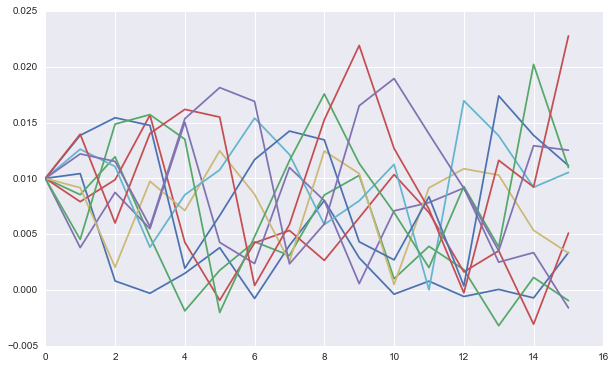

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(paths_numba[:, :10]);

In [192]:
%timeit vasicek_numba(I=I, M=M)

The slowest run took 8.63 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.42 µs per loop


### Memory Layout

Finally, a somehow practical example for the importance of memory layouting.

In [196]:
def vasicek_numpy_transpose(I=I, M=M):
    paths = np.zeros((I, M + 1))
    paths[0] = r0
    for t in range(1, M + 1):
        paths[:, t] = paths[:, t - 1] + kappa * (theta - paths[:, t - 1]) * dt \
                    + sigma * dt ** 0.5 * np.random.standard_normal(I)
    return paths

In [197]:
I = 1000000
M = 10

In [198]:
%time paths_numpy = vasicek_numpy(I, M)

NameError: name 'vasicek_numpy' is not defined

In [ ]:
%time paths_numpy_transpose = vasicek_numpy_transpose(I, M)

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="mailto:yves@tpq.io">yves@tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="http://hilpisch.com" target="_blank">http://hilpisch.com</a> 

**Quant Platform** &mdash; <a href="http://quant-platform.com" target="_blank">http://quant-platform.com</a>

**Python for Finance** &mdash; <a href="http://python-for-finance.com" target="_blank">http://python-for-finance.com</a>

**Derivatives Analytics with Python** &mdash; <a href="http://derivatives-analytics-with-python.com" target="_blank">http://derivatives-analytics-with-python.com</a>

**Python Trainings** &mdash; <a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>